<a href="https://colab.research.google.com/github/ManuChandana/AI-ML/blob/main/NB_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/heart.csv')
print("\nDataset loaded successfully!")


Dataset loaded successfully!


In [ ]:
# Load the dataset
print("\nDataset Preview:")
print(df.head())


Dataset Preview:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [ ]:
# Step 2: Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Step 3: Data Preprocessing
# If any missing values exist, fill them or drop them (here we drop for simplicity)
df = df.dropna()

In [ ]:
# Splitting features and target variable
# Assuming 'target' is the column indicating heart disease presence (1) or absence (0)
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Step 5: Train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Step 6: Evaluate the model
y_pred = model.predict(X_test)

In [ ]:
# Calculate accuracy and precision
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("\n Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


 Metrics:
Accuracy: 0.83
Precision: 0.81
Mean Squared Error (MSE): 0.17073170731707318
R-squared (R2): 0.31666666666666643


In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       100
           1       0.81      0.88      0.84       105

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



In [ ]:
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Confusion Matrix:
[[78 22]
 [13 92]]


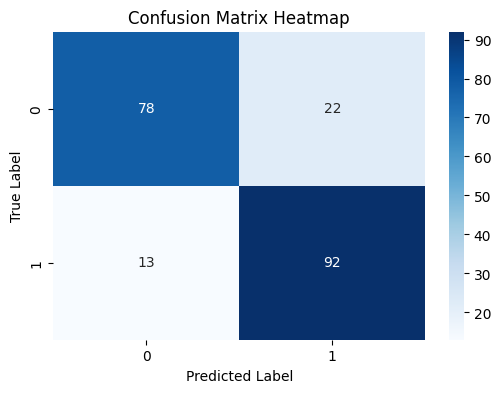

In [ ]:
# Optional: Display confusion matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()